## Analyzing the Data 

Exploring our data set using heat map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Module
np.set_printoptions(threshold=sys.maxsize)
df = pd.read_csv('train.csv')

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for missing data

In [2]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


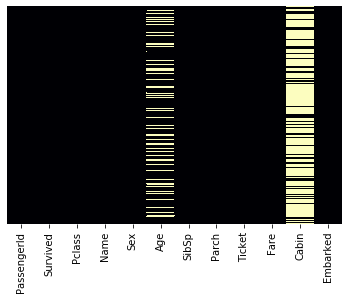

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

We can see significant missing data for 'Age' and 'Cabin' data

In [4]:
total_values = len(df)
missing_age_values = df['Age'].isna().sum()
missing_cabin_values = df['Cabin'].isna().sum()
print((missing_age_values/total_values)*100)
print((missing_cabin_values/total_values)*100)

19.865319865319865
77.10437710437711


<center><b>Table 1</b></center>

Data | Missing %  |
------------ | ------------ |
Age | 19.8653
Cabin | 77.1043



We will perform Statistical Imputation for the missing 'Age' data. 
Cabin data has too many missing values!
(In statistics, imputation is the process of replacing missing data with substituted values.)

First we Look at the characteristics of surviving and non-surviving passengers with available 'Age' data.<br />


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


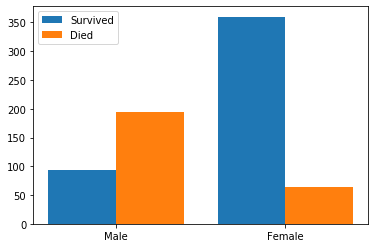

In [5]:
surviving_passengers_male = Module.calc_survive_male(df)
surviving_passengers_female = Module.calc_survive_female(df)
dead_passengers_male = Module.calc_dead_male(df)
dead_passengers_female = Module.calc_dead_female(df)
#surviving_passengers_female = Module.calc_survive_female(df)
#print(surviving_passengers_female[:,0])
#print(dead_passengers_male[:,0])
#print(dead_passengers_male[:,0])

# create data

print(surviving_passengers_male[:,0])

x = np.arange(2)
key = ['Survived','Died']
y1 = [len(surviving_passengers_male[:,3]),len(dead_passengers_male[:,3])]
y2 = [len(surviving_passengers_female[:,3]), len(dead_passengers_female[:,3])]
width = 0.40
  
# plot data in grouped manner of bar type
plt.xticks([0,1], [ 'Male','Female'])
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.legend(key,loc=2)



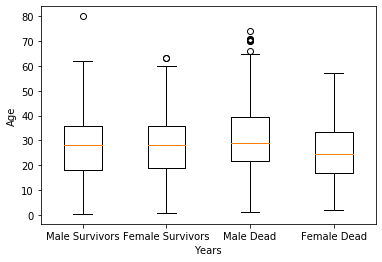

In [6]:

ages = [surviving_passengers_male[:,3], surviving_passengers_female[:,3], dead_passengers_male[:,3], dead_passengers_female[:,3]]


plt.figure()
plt.boxplot(ages)
plt.xticks([1, 2, 3, 4], ['Male Survivors', 'Female Survivors', 'Male Dead', 'Female Dead'])
plt.xlabel("Years")
plt.ylabel("Age")
plt.show()

Correlation between the different variables

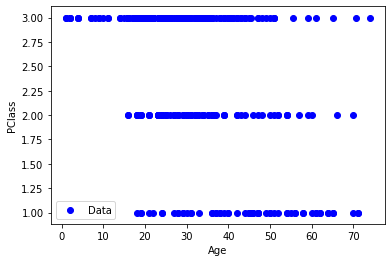

In [7]:
passenger_class  = dead_passengers_male[:,1]
passenger_age = dead_passengers_male[:,3]



# Plot results:
plt.figure()
ax = plt.axes()
ax.scatter(passenger_age, passenger_class, color='b', label='Data')
#ax.invert_xaxis()
ax.set_xlabel('Age')
ax.set_ylabel('PClass')
ax.legend()
plt.show()

In [26]:
a = surviving_passengers_female[:,1]
b = surviving_passengers_female[:,3]
c = 1


surviving_passengers_male 
surviving_passengers_female 
dead_passengers_male 
dead_passengers_female 

Module.calc_average_age_class(a, b, c)

34.5625

 ||**Surviving<br> Female**|**Surviving<br> Male**|**Dead<br> Female**|**Dead<br> Male**
:-----:|:-----:|:-----:|:-----:|:-----:
Pclass 3|19.329|22.274|23.818|27.255
Pclass 2|28.080|16.022|36.0|33.369
Pclass 1|34.5625|36.248|25.67|44.582

## Parsing Data using written function to get relevant features

In [9]:
import pandas as pd
import numpy as np
import Module
import math
import importlib
importlib.reload(Module)
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import lecture12util as lu
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
np.set_printoptions(threshold=np.inf)
import csv

df = pd.read_csv('train.csv')
#df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])
#df = df[df['Embarked'].notna()]

#print(df)
#print(df)

x= Module.calc(df)

#print(x[:,0])
#print(x.shape)


## Dimension reduction

Used Principle component analysis to reduce the dimensions of the features/data array.



In [10]:
from sklearn.preprocessing import StandardScaler

#print(x[:,1:])

data = x[:,1:]
label = x[:,0]
#print(data)
#print(x[:,0])

scaler = StandardScaler()

scaler.fit(data)

scaled_data = scaler.transform(data)

#print(scaled_data)

from sklearn.decomposition import PCA

pca = PCA(n_components=7)

pca.fit(scaled_data)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#print(var1)
#plt.plot(var1)

x_pca = pca.transform(scaled_data)

#print(scaled_data.shape)

#print(x_pca)

In [11]:

pca = PCA(n_components=3)
pca.fit(scaled_data)
x_pca=pca.fit_transform(scaled_data)

print(x_pca.shape)

(712, 3)


## Training Machine Learnning Model

Used K Nearest Neighbor supervised learning algorithm.



In [12]:
#Checking best performance depending on PCA dimensionality

classification_rate_checker = []

#print(x_pca.shape)
k_final = x_pca
#print(k_final.shape)
#print(label.shape)
#print(label)

x_train,x_test,y_train,y_test = train_test_split(k_final, label, random_state=0, test_size=0.2)
knn  = KNeighborsClassifier(n_neighbors=3)
y_train=y_train.astype('int')
#print(len(x_train))
#print(len(y_train))
#print(y_train)
knn.fit(x_train, y_train)
labelsp = knn.predict(x_test)
cr = lu.classification_rate(y_test, labelsp)
print(f'Classification rate: {cr}')



Classification rate: 0.7622377622377622


<center><b>Table 1</b></center>

Dimension | Cr  |
------------ | ------------ |
7 | 0.7552447552447552
6 | 0.7552447552447552
5 | 0.7552447552447552
4 | 0.7622377622377622  
3 | 0.7622377622377622 
2 | 0.7132867132867133  


## Applying Machine Learning Model to test data

First apply PCA to test data


In [13]:
df_test = pd.read_csv('test.csv')

#print(df)

Test_Passenger_ID = df_test.PassengerId

x_test_data= Module.calc_test(df_test)

print(x_test_data.shape)
print(x_test_data)

AttributeError: module 'Module' has no attribute 'calc_test'

In [87]:

from sklearn.preprocessing import StandardScaler

#print(x[:,1:])

test_data = x_test_data[:,0:]
print(test_data.shape)

scaler = StandardScaler()

scaler.fit(test_data)

test_data_scaled= scaler.transform(test_data)

#print(test_data_scaled)

pca = PCA(n_components=3)
pca.fit(test_data_scaled)
x_pca_test=pca.fit_transform(test_data_scaled)

#print(x_pca_test.shape)

#print(test_data_scaled.shape)

(418, 7)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [62]:
labelsp_test = knn.predict(x_pca_test)

print(labelsp_test)

[0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0
 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0]


In [78]:
#subm =[]
#subm[:,0] = Test_Passenger_ID
#subm[:,1] = labelsp_test

#submission = np.column_stack(Test_Passenger_ID, labelsp_test)

print(len(Test_Passenger_ID), len(labelsp_test))
#print(labelsp_test)

418 332
